# Test of class HyperCube lattice

This notebook uses the class in 'HC_Lattice.py' that builds a generic N dimensional lattice, it finds the set of links (E and U), the plaquettes (closed loops of 4 sites, pnly if dimensions>1) and defines the chain that will be used for Jordan-Wigner mapping of fermionic degrees of freedom.

>The code has also the option to visualize the lattice and, if a Gauss law in the applied (import from another class) it can draw the set of links that remain dynamical.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from scipy.sparse.linalg import eigsh
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt
import sys
import random
from sympy import Symbol
sys.path.append("../") # go to parent dir

In [4]:
from HC_Lattice import *

In [5]:
n_sites = [3,2,1]#how many sites for every dimension
while 1 in n_sites:#avoid 1 dimension
    n_sites.remove(1)

dims = len(n_sites) #how many dimensions

pbc = True#[True,False,False]
dims

2

In [6]:
class_lattice = HCLattice(n_sites=n_sites,pbc=pbc,puregauge=False)

In [7]:
#set of random links to keep dynamical
u_op_free_example =random.choices(list({Symbol(item) for sublist in class_lattice.list_edges2_u_op for item in sublist}),k=5)
u_op_free_example

[U_21y, U_10y, U_00y, U_00x, U_21y]

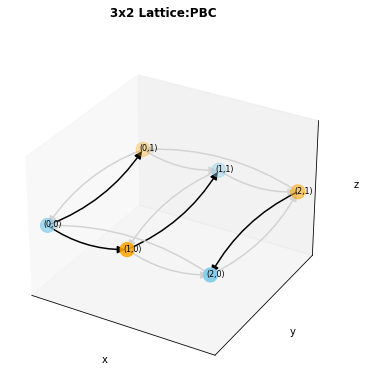

In [8]:
class_lattice.draw_graph_func(gauss_law_fig=True,u_op_free=u_op_free_example)#,savefig_dir='.')


In [9]:
class_lattice.list_plaq_u_op

[['U_00x', 'U_10y', 'U_01x', 'U_00y'],
 ['U_01x', 'U_11y', 'U_00x', 'U_01y'],
 ['U_10x', 'U_20y', 'U_11x', 'U_10y'],
 ['U_11x', 'U_21y', 'U_10x', 'U_11y'],
 ['U_20x', 'U_00y', 'U_21x', 'U_20y'],
 ['U_21x', 'U_01y', 'U_20x', 'U_21y']]

In [10]:
#TODO: check if duplicates
from iteration_utilities import duplicates

list(duplicates(class_lattice.plaq_list, key=tuple))

[]

In [11]:
class_lattice.jw_chain

[((0, 0), (1, 0)),
 ((1, 0), (2, 0)),
 ((2, 0), (2, 1)),
 ((2, 1), (1, 1)),
 ((1, 1), (0, 1))]

In [12]:
class_lattice.jw_sites

[(0, 0), (1, 0), (2, 0), (2, 1), (1, 1), (0, 1)]